In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import os

In [3]:
os.getcwd()

'c:\\Users\\ankita\\Desktop\\Personal_Project\\Customer_churn_analytics\\src\\research'

In [4]:
## reading the csv
churn_df = pd.read_csv("./../artifacts/customer_churn.csv")

In [5]:
churn_df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [6]:
churn_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
churn_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Data ckecks to perform
* check for null values
* check for duplicates
* check for data types
* check the number of unique values in each columns
* check statistics of data


In [8]:
## There are no null values
churn_df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
## There are no duplicate values
churn_df.duplicated().sum()

np.int64(0)

In [10]:
churn_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [41]:
categorical_columns = churn_df.select_dtypes(['object', 'category'])
churn_df[categorical_columns.columns].nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
Churn                  2
dtype: int64

In [12]:
## We have senior citizen dtype is int but looking at the describe  it only has 2 values so it sould be category
churn_df['SeniorCitizen'] = churn_df['SeniorCitizen'].astype('object')

In [38]:
## here we see that Total charges are of object type but it should be of float type
churn_df['TotalCharges'] = pd.to_numeric(churn_df['TotalCharges'], errors = 'coerce')

In [14]:
churn_df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


### Exploring data (Visualization)

In [15]:
churn_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [16]:
## Churn count Senior and non senior
churn_count= churn_df['Churn'].value_counts()

In [17]:
churn_count.to_frame()

,count
Churn,
No,5174
Yes,1869


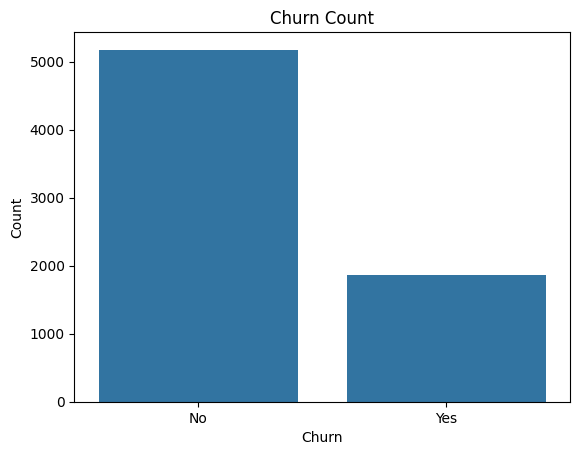

In [18]:
sns.countplot(data = churn_df, x = 'Churn')
plt.title("Churn Count")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

* its an imbalanced data set where the churn count is lower than the non churn count

In [19]:
print(churn_df.query("Churn == 'Yes' and gender == 'Male'")['Churn'].count())
print(churn_df.query("Churn == 'Yes' and gender == 'Female'")['Churn'].count())
print(churn_df.query("Churn == 'Yes' and SeniorCitizen == 0")['Churn'].count())
print(churn_df.query("Churn == 'Yes' and SeniorCitizen == 1")['Churn'].count())
print(churn_df.query("Churn == 'Yes' and SeniorCitizen == 0 and gender == 'Male'")['Churn'].count())
print(churn_df.query("Churn == 'Yes' and SeniorCitizen == 0 and gender == 'Female'")['Churn'].count())

930
939
1393
476
694
699


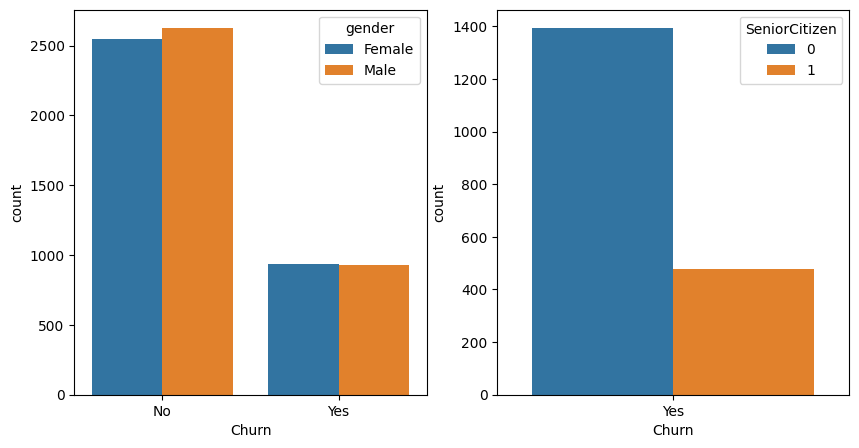

In [20]:
fig, axs = plt.subplots(1,2, figsize =(10,5))
plt.subplot(121)
sns.countplot(data = churn_df, x = 'Churn', hue ='gender')
plt.subplot(122)
sns.countplot(data = churn_df.query("Churn == 'Yes'"), x = 'Churn', hue ='SeniorCitizen')
# plt.title("Churn Count")
# plt.xlabel("Churn")
# plt.ylabel("Count")
plt.show()

* on Gender based there is no much of a difference but most of the churned types are non senior citizen. 

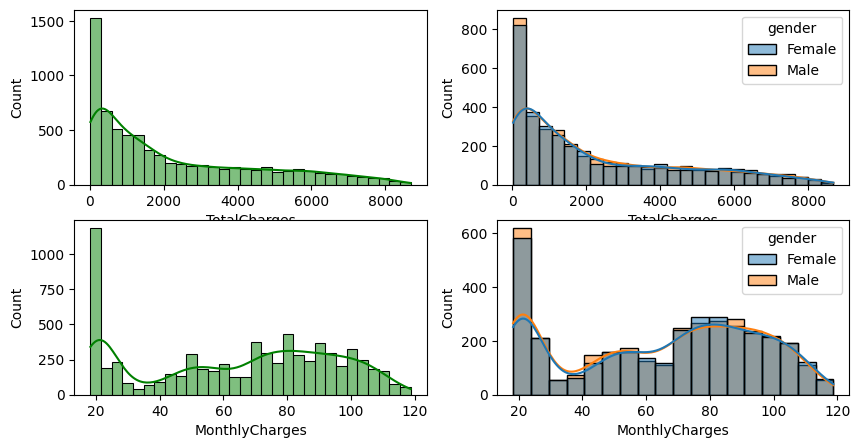

In [21]:
## histogram  and KDE

fig, axs = plt.subplots(2,2, figsize =(10,5))

sns.histplot(data = churn_df, x = 'TotalCharges', bins = 30, kde =True, color = 'g', ax = axs[0,0])

sns.histplot(data = churn_df, x = 'TotalCharges', kde =True, hue = 'gender',ax = axs[0,1])

sns.histplot(data = churn_df, x = 'MonthlyCharges', bins = 30, kde =True, color = 'g',ax = axs[1,0])

sns.histplot(data = churn_df, x = 'MonthlyCharges', kde =True, hue = 'gender',ax = axs[1,1])
plt.show()


* The Total charges are left skewed and the above images shows that the total bill and the monthly bill for most of the customers are lower.

In [22]:
churn_df[categorical_columns.columns].head(2)

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.50,No


### Senior and non Senior 

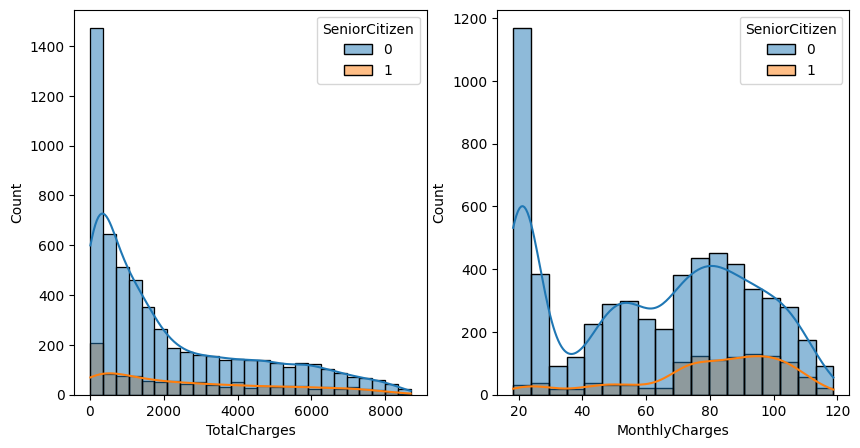

In [23]:
## histogram  and KDE

fig, axs = plt.subplots(1,2, figsize =(10,5))

sns.histplot(data = churn_df, x = 'TotalCharges', kde =True, hue = 'SeniorCitizen',ax = axs[0])

sns.histplot(data = churn_df, x = 'MonthlyCharges', kde =True, hue = 'SeniorCitizen',ax = axs[1])
plt.show()

* here something that we see is that non senior citizen the total and montly charges are higher compared to senior citizen

In [24]:
churn_df[categorical_columns.columns]

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.50,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.50,No
7039,2234-XADUH,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.90,No
7040,4801-JZAZL,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45,No
7041,8361-LTMKD,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,306.60,Yes


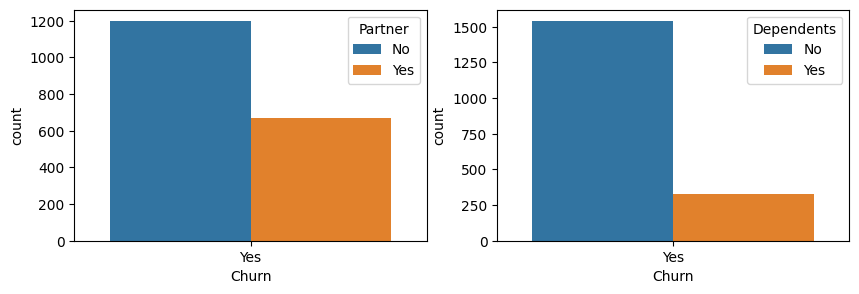

In [25]:
fig, axs = plt.subplots(1,2, figsize =(10,3))
plt.subplot(121)
sns.countplot(data = churn_df.query("Churn == 'Yes'"), x = 'Churn', hue ='Partner')
plt.subplot(122)
sns.countplot(data = churn_df.query("Churn == 'Yes'"), x = 'Churn', hue ='Dependents')
plt.show()

* The Customers who dont have partners and are independent I see the churn is much higher compared to cutomers who have partners and dependents

In [26]:
churn_df.select_dtypes(['int64','float64']).head(5)

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


<Axes: xlabel='tenure', ylabel='Count'>

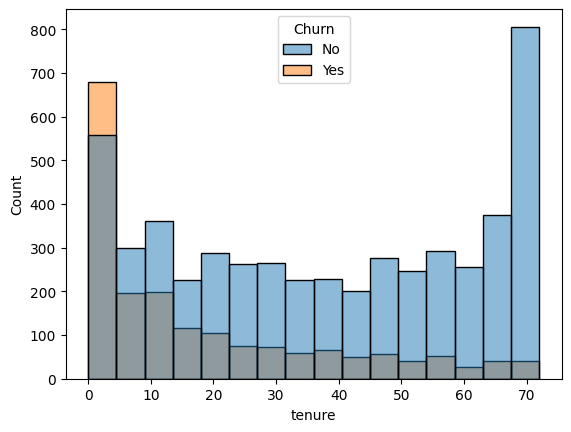

In [27]:

sns.histplot(data = churn_df, x = 'tenure', hue='Churn')

* We see shorter duration more churn and longer duration less churn . Churns are dependent on tunure which is obvious

Text(0.5, 1.0, 'Churn based on tunure and gender')

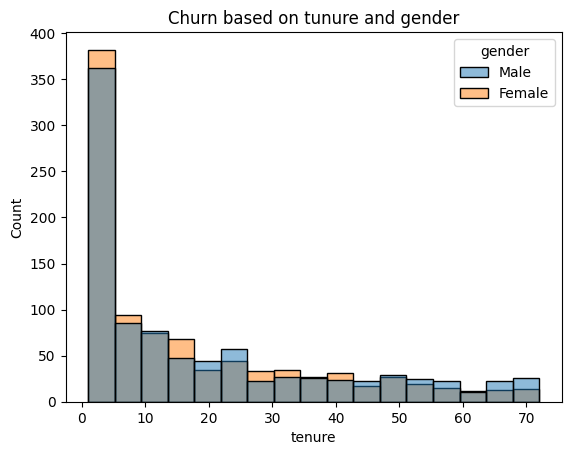

In [28]:
sns.histplot(data = churn_df.query("Churn == 'Yes'"), x = 'tenure', hue='gender')
plt.title("Churn based on tunure and gender")

* Something to notice is that females with shorter tenure churns count is little high but males with longer tenure the churn count gets little higher

In [56]:
categorical_columns.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn'],
      dtype='object')

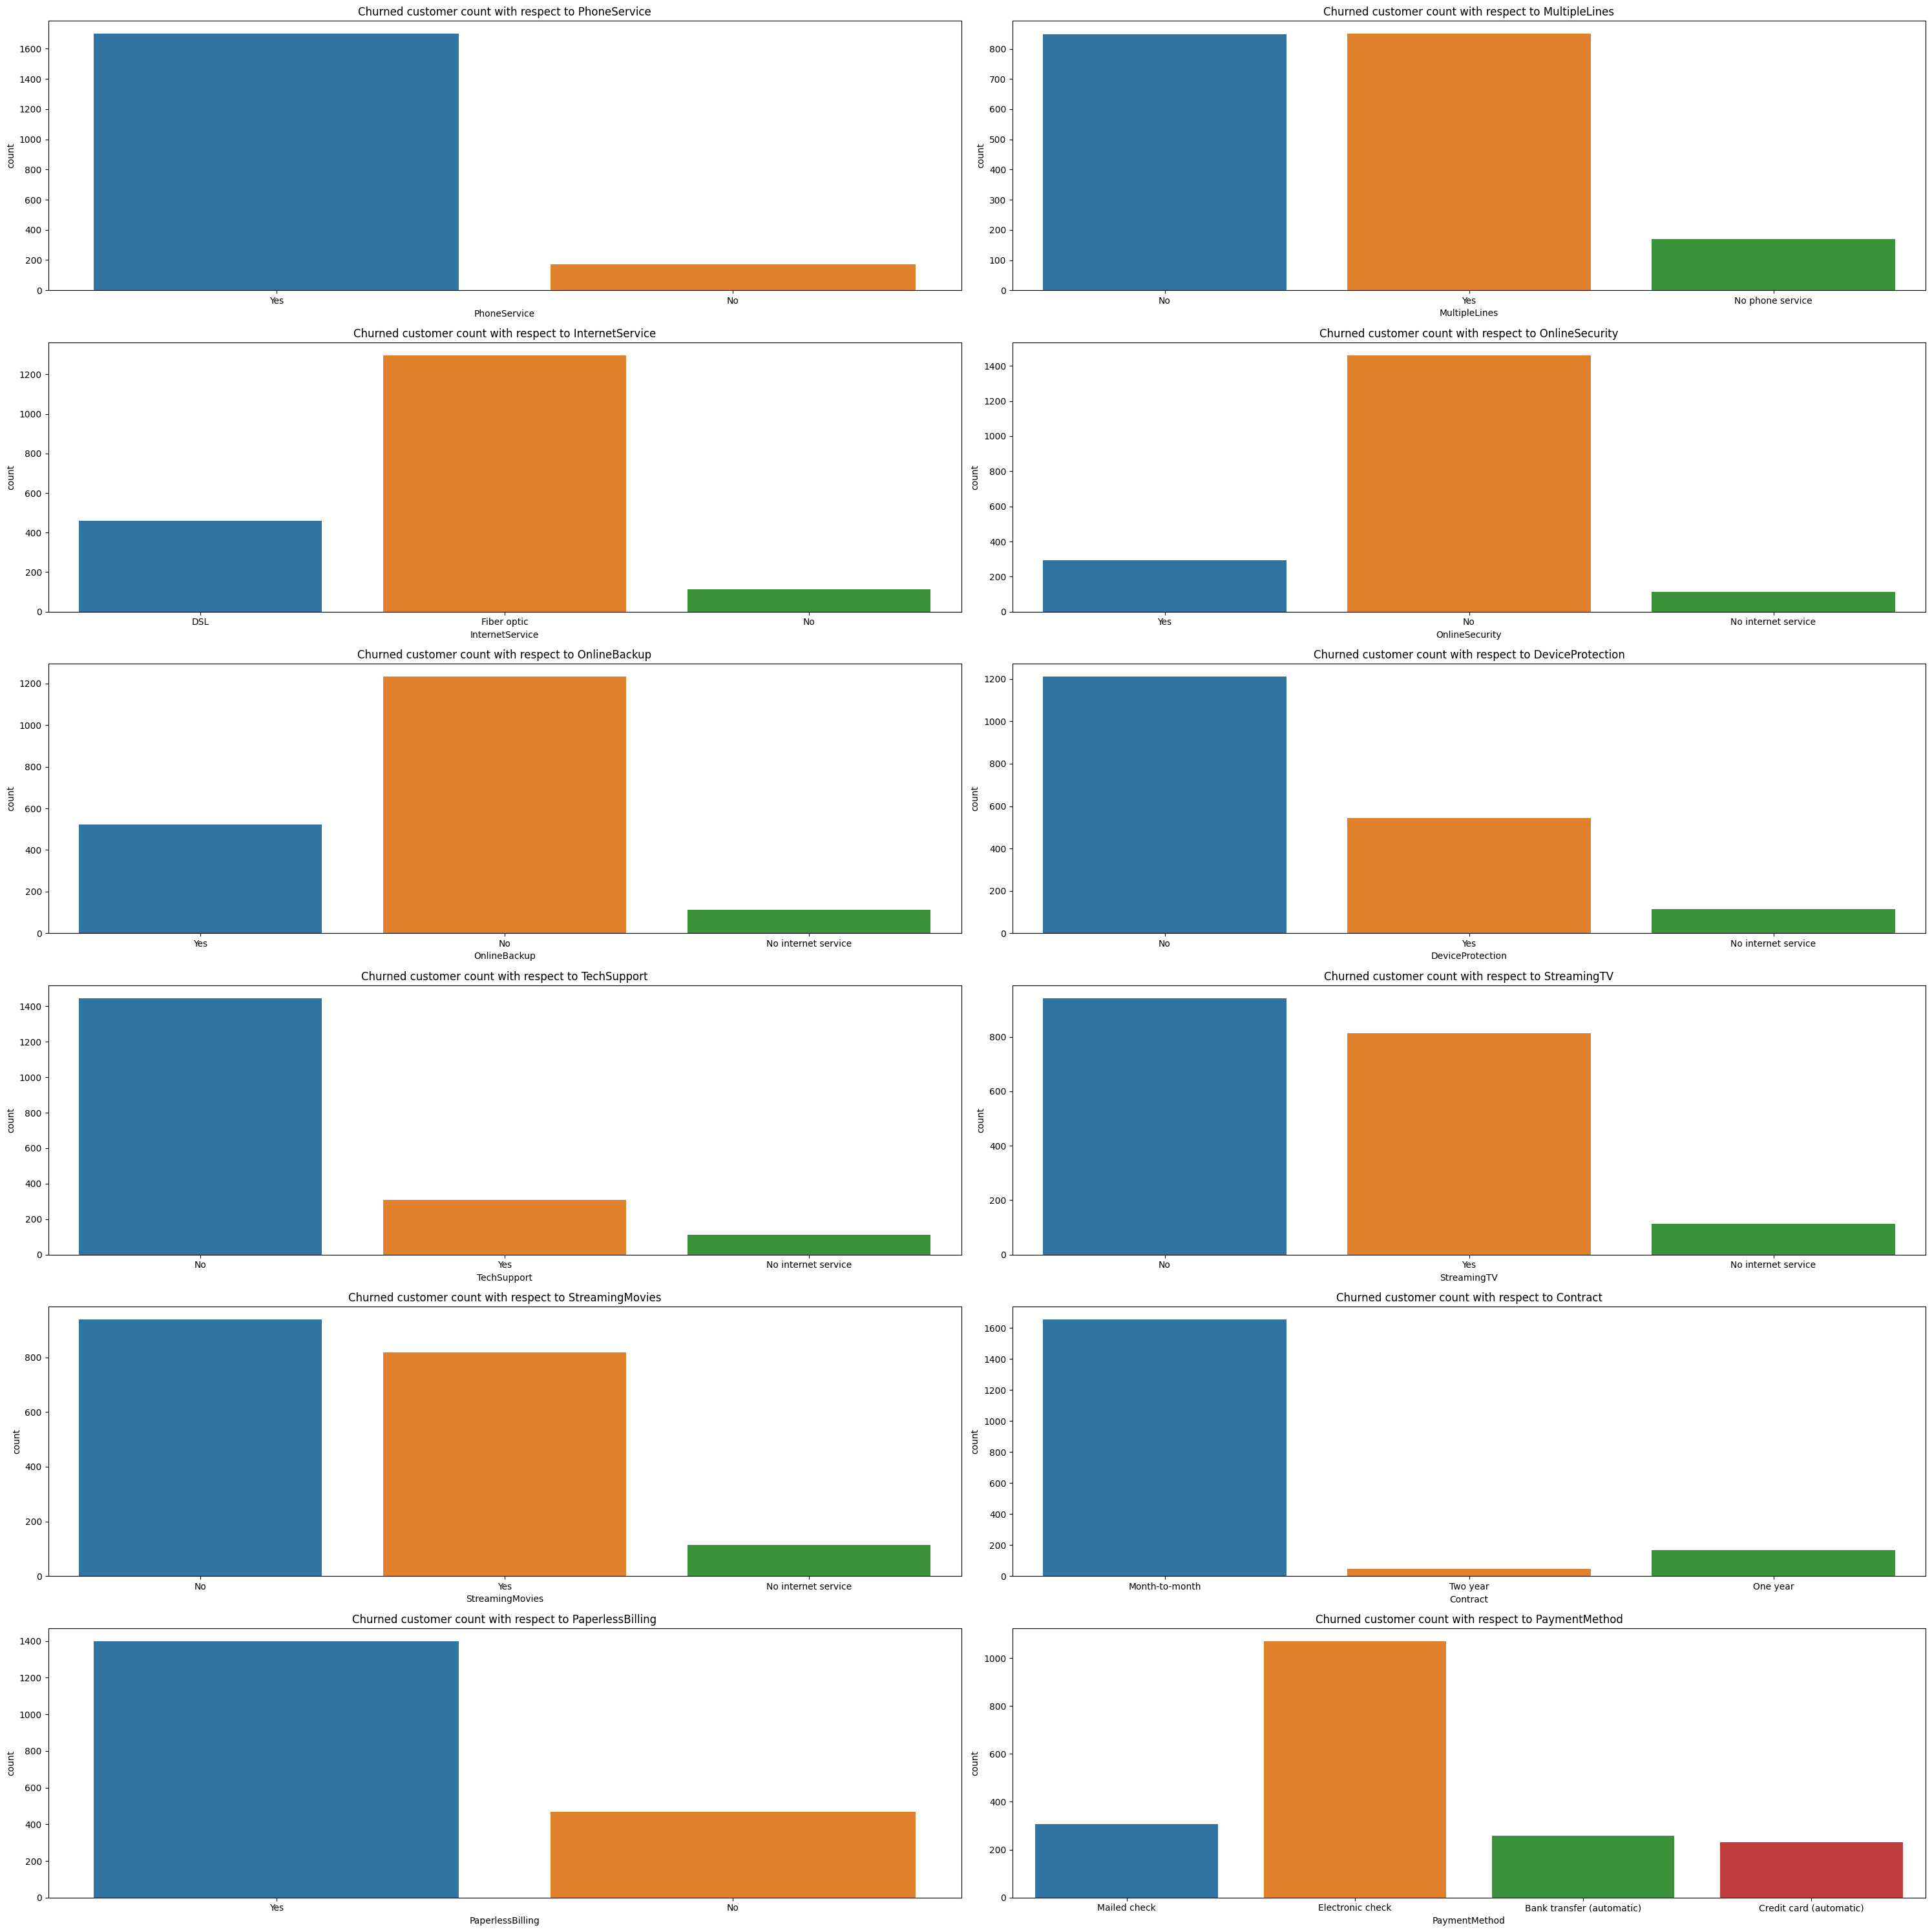

In [75]:
# List of categorical features to plot
features = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
            'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Create subplots
fig, axs = plt.subplots(6, 2, figsize=(30, 30))

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Loop through each feature and plot
for i, feature in enumerate(features):
    sns.countplot(data=churn_df.query("Churn == 'Yes'"), x=feature, hue=feature, ax=axs[i])
    axs[i].set_title(f"Churned customer count with respect to {feature}")

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

#### Some interesting things to observe
* Churned customers are more when they use phone service
* Churned customers are more when they opt for when they have or have not multiple lines
* Chured customers are more when they opt for fiber optics for the internet service
* Churned customers are more when they have no Online Security